In [1]:
import pandas as pd
import numpy as np
import ExMAS
import ExMAS.main
import ExMAS.utils
import pprint
import os
import osmnx as ox
import dotmap
import sys
import random
import time
import math
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [16, 16]

import networkx as nx #graphs
cwd = os.getcwd()

from ExMAS.utils import inData as inData
from dotmap import DotMap


In [2]:
# df1 = pd.read_csv('City_requests.csv') #demografia Wzgórza Krzesławickie
# df = df1.loc[df1.index.repeat(df1.ogolem)].reset_index(drop=True) #repeat Rows N times (equal "ogolem"): N Rows = N people 

# params = ExMAS.utils.get_config('default_SUM.json') # load the default
# params.city = 'Krakow, Poland'
# params = ExMAS.utils.make_paths(params) # update file paths

# inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph
# frac = 0.2
# params.shared_discount = 0.3
# params.nP = int(frac * len(df))
# params.simTime = 0.5
# params.t0 = params.t0.replace(hour=8)
# params.speeds.ride = 6
# params.VoT = 0.003
# params.price = 1.5
# sample = df.sample(n = int(frac * len(df)), replace=False, weights=None, random_state=None, axis=None) # demand of RP=frac*population
# sample['origin'] = sample.apply(lambda row:  ox.get_nearest_node(inData.G, (row['y'], row['x'])), axis = 1) 

# inData = ExMAS.utils.generate_demand(inData, params) #generate trip requests

# my_requests = inData.requests
# my_requests.destination = ox.get_nearest_node(inData.G,[50.09516, 20.06522])
# my_requests["origin"] = sample.origin.values

# my_requests['dist'] = my_requests.apply(lambda request: inData.skim.loc[request.origin, request.destination], axis=1)

# my_requests['ttrav'] = my_requests.apply(lambda request: pd.Timedelta(request.dist, 's').floor('s'), axis=1)
# #my_requests.ttrav = (pd.to_timedelta(my_requests.ttrav) / params.speeds.ride).dt.floor('1s')
# my_requests.tarr = [request.treq + request.ttrav for _, request in my_requests.iterrows()]
# my_requests = inData.requests
# inData.requests = my_requests
# # inData.requests.to_csv("check.csv")

# inData = ExMAS.main(inData, params)

# KPIs = inData.sblts.res.to_frame()[:23]
# KPIs['description']  = ExMAS.utils.KPIs_descriptions
# KPIs.columns = ['KPI', 'description']
# KPIs
# # KPIs.to_csv("KPIs022.csv")

In [3]:
# ExMAS.utils.plot_demand(inData, params)

## START ##

In [4]:
df1 = pd.read_csv('City_requests.csv') #demografia Wzgórza Krzesławickie
df = df1.loc[df1.index.repeat(df1.ogolem)].reset_index(drop=True) #repeat Rows N times (equal "ogolem"): N Rows = N people 
params = ExMAS.utils.get_config('default_SUM.json') # load the default
params.city = 'Krakow, Poland'
params = ExMAS.utils.make_paths(params) # update file paths
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [5]:
def run_ExMAS_SUM(inData, params, frac):

    params.nP = int(frac * len(df))
    sample = df.sample(n = int(frac * len(df)), replace=False, weights=None, random_state=None, axis=None) # demand of RP=frac*population
    sample['origin'] = sample.apply(lambda row:  ox.get_nearest_node(inData.G, (row['y'], row['x'])), axis = 1) 
    inData = ExMAS.utils.generate_demand(inData, params) #generate trip requests

    hub = ox.get_nearest_node(inData.G,[50.09516, 20.06522]) 

    
    my_requests = inData.requests
    my_requests.destination = hub
    my_requests["origin"] = sample.origin.values
    my_requests['dist'] = my_requests.apply(lambda request: inData.skim.loc[request.origin, request.destination], axis=1)
    my_requests['ttrav'] = my_requests.apply(lambda request: pd.Timedelta(request.dist, 's').floor('s'), axis=1)
    my_requests.tarr = [request.treq + request.ttrav for _, request in my_requests.iterrows()]
    my_requests = inData.requests
    inData.requests = my_requests
    # inData.requests.to_csv("check.csv")
    inData = ExMAS.main(inData, params)
    KPIs = inData.sblts.res.to_frame()[:23]
    KPIs['description']  = ExMAS.utils.KPIs_descriptions
    KPIs.columns = ['KPI', 'description']
    KPIs
    KPIs.to_csv("KPIs"+str(frac)+".csv")
    return KPIs



params.shared_discount = 0.3
params.simTime = 0.5
params.t0 = params.t0.replace(hour=8)
params.speeds.ride = 6
params.VoT = 0.003
params.price = 1.5
results = dict()
        
for frac in  [0.01, 0.02]:
    print(frac)
    results[frac] = run_ExMAS_SUM(inData, params, frac)


    


0.01
12-01-24 12:16:53-INFO-Initializing pairwise trip shareability between 26 and 26 trips.
12-01-24 12:16:53-INFO-creating combinations
12-01-24 12:16:53-INFO-650	 nR*(nR-1)
12-01-24 12:16:53-INFO-Reduction of feasible pairs by 96.92%
12-01-24 12:16:53-INFO-Degree 2 	Completed
12-01-24 12:16:53-INFO-trips to extend at degree 2 : 45
12-01-24 12:16:53-INFO-At degree 2 feasible extensions found out of 22 searched
12-01-24 12:16:53-INFO-Degree 3 	Completed
12-01-24 12:16:53-INFO-trips to extend at degree 3 : 22
12-01-24 12:16:53-INFO-At degree 3 feasible extensions found out of 4 searched
12-01-24 12:16:53-INFO-Degree 4 	Completed
12-01-24 12:16:53-INFO-trips to extend at degree 4 : 4
12-01-24 12:16:53-INFO-At degree 4 feasible extensions found out of 0 searched
12-01-24 12:16:53-INFO-Degree 5 	Completed
12-01-24 12:16:53-INFO-No more trips to exted at degree 5
12-01-24 12:16:54-INFO-Matching 26 trips to 97 rides in order to minimize u_veh
12-01-24 12:16:54-INFO-Problem solution: Optimal

In [6]:
# hub = [ox.get_nearest_node(inData.G,[50.09516, 20.06522]), ox.get_nearest_node(inData.G,[50.09203901, 20.07409523])] 
# for h in hub:
#     print(h)

# plotting #

In [7]:
df2 = pd.read_csv('KPI_results.csv', index_col=0)

df2['del_VehHourTrav']=abs(df2['VehHourTrav']-df2['VehHourTrav_ns'])/df2['VehHourTrav_ns']           # KPI1: vehicle hours reduction
df2['del_PassUtility']=abs((df2['PassUtility']-df2['PassUtility_ns'])/df2['PassUtility_ns'])      # KPI2: travellers utility gains
df2['Occupancy']=df2['PassHourTrav']/df2['VehHourTrav']                                       # KPI4: occupancy
df2['del_PassHourTrav']=abs((df2['PassHourTrav']-df2['PassHourTrav_ns'])/df2['PassHourTrav_ns'])  # KPI5: passenger hours increase
df2['del_fleet_size']=abs((df2['fleet_size_shared']-df2['fleet_size_nonshared'])/df2['fleet_size_nonshared'])  # KPI6: potential fleet size reduction                  
                  
df2['frac'] = round((df2['nR'] / len(df)),2)

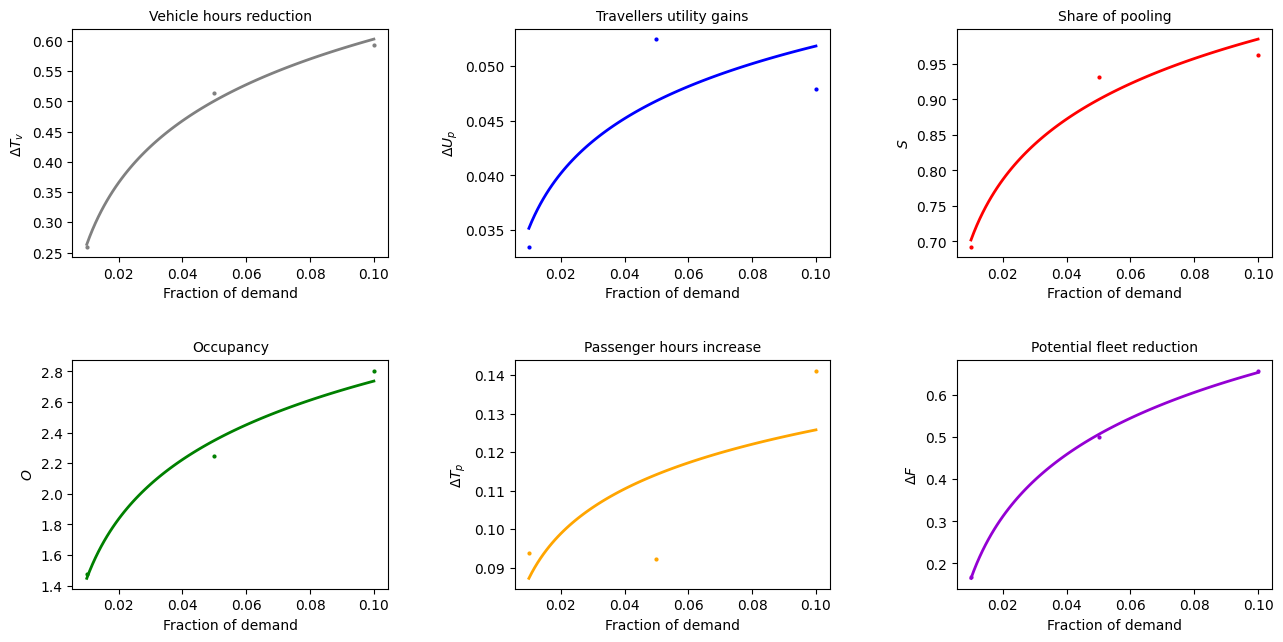

In [9]:
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots

def plot_log_fit(x,y,ax, color = 'black'):
    popt, pcov = curve_fit(lambda t, a, b, c: a * np.log(b * t) + c, x,y )
    a = popt[0]
    b = popt[1]
    c = popt[2]
    x_fitted = np.linspace(np.min(x), np.max(x), 100)
    y_fitted = a * np.log(b * x_fitted) + c
    ax.plot(x_fitted, y_fitted, lw = 2, color = color)

fig, axes = plt.subplots(2,3, figsize = (12,8))
axes = axes.flatten()

ax=axes[0]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.del_VehHourTrav, ax, 'grey')
to_plot = df2.groupby(df2.frac).del_VehHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='grey', marker = 'o')
ax.set_ylabel("$\Delta T_v$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Vehicle hours reduction", fontsize=10, fontweight='normal')

ax=axes[1]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.del_PassUtility, ax, 'blue')
to_plot = df2.groupby(df2.frac).del_PassUtility.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')
ax.set_ylabel("$\Delta U_p$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Travellers utility gains", fontsize=10, fontweight='normal')

ax=axes[2]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.shared_ratio, ax, 'red')
to_plot = df2.groupby(df2.frac).shared_ratio.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='red', marker = 'o')
ax.set_ylabel("$S$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Share of pooling", fontsize=10, fontweight='normal')

ax=axes[3]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.Occupancy, ax, 'green')
to_plot = df2.groupby(df2.frac).Occupancy.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')
ax.set_ylabel("$O$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Occupancy", fontsize=10, fontweight='normal')

ax=axes[4]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.del_PassHourTrav, ax, 'orange')
to_plot = df2.groupby(df2.frac).del_PassHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='orange', marker = 'o')
ax.set_ylabel("$\Delta T_p$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Passenger hours increase", fontsize=10, fontweight='normal')

ax=axes[5]
to_plot = df2
plot_log_fit(to_plot.frac, to_plot.del_fleet_size, ax, 'darkviolet')
to_plot = df2.groupby(df2.frac).del_fleet_size.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='darkviolet', marker = 'o')
ax.set_ylabel("$\Delta F$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Potential fleet reduction", fontsize=10, fontweight='normal')


plt.subplots_adjust(left=0,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.45)
plt.savefig('F1.jpg', dpi=100)
